1-Create a variable that contains the weighted average of the grades in the dataset. The number of students in the fourth grade is different from that of the eighth grade. So you will need a weighted average!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats.mstats import winsorize
import scipy.stats as stats
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pd.options.display.max_columns = None

student = pd.read_csv("datasets_95317_1078789_states_all.csv").reset_index()
student

,index,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


In [2]:
student.fillna(student.groupby(["STATE"]).mean(), inplace=True)
student["WEIGHTED_MEAN_SCORE"]=(student["GRADES_4_G"]*student["AVG_MATH_4_SCORE"]+
                            student["GRADES_4_G"]*student["AVG_READING_4_SCORE"]+
                            student["GRADES_8_G"]*student["AVG_MATH_8_SCORE"]+
                            student["GRADES_8_G"]*student["AVG_READING_8_SCORE"])/(
                            2*(student["GRADES_4_G"]+student["GRADES_8_G"]))
student.WEIGHTED_MEAN_SCORE.describe()

count    408.000000
mean     251.106279
std        6.874353
min      217.219534
25%      246.949573
50%      252.490496
75%      255.718595
max      266.345301
Name: WEIGHTED_MEAN_SCORE, dtype: float64

In [3]:
student.columns

Index(['index', 'PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE', 'WEIGHTED_MEAN_SCORE'],
      dtype='object')

2-What is the correlation between the variable you just created and the types of expenditures? Which expenditure item has more correlation than others?
 

In [4]:
St_corr = student[["WEIGHTED_MEAN_SCORE","TOTAL_EXPENDITURE",
       "INSTRUCTION_EXPENDITURE","SUPPORT_SERVICES_EXPENDITURE",
        "OTHER_EXPENDITURE"]].corr()

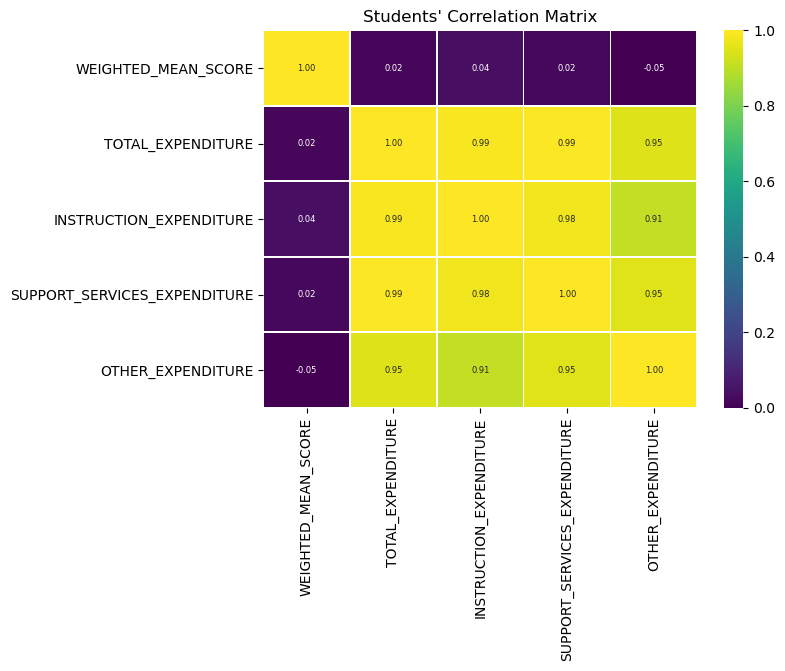

In [5]:
plt.figure(figsize=(7,5),dpi=100)
sns.heatmap(St_corr, annot=True, fmt='.2f', annot_kws={"size": 6}, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Students' Correlation Matrix")

plt.show()

Grafiğe göre aslında çok olmasa da ağırlıklı ortalama ile en çok korelasyona sahip olan değişken Instuction Expenditure iledir. 

Aynı zaman da other_expenditure hariç diğer iki harcama türüyle korelasyon değerlerinin yakın olduğu görülmektedir.

3-Now apply the Principal Components Analysis (PCA) for the four expenditure items! How much of the total variance can be explained by the first component?

In [6]:
expenditures =student[["TOTAL_EXPENDITURE",
       "INSTRUCTION_EXPENDITURE","SUPPORT_SERVICES_EXPENDITURE",
        "OTHER_EXPENDITURE"]]

len(expenditures.columns)

4

In [7]:
expenditures = expenditures.dropna()
X = StandardScaler().fit_transform(expenditures)
pca = PCA(n_components=4)
principalComponents=pca.fit_transform(X)


exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[9.71355694e-01 2.46874518e-02 3.49316153e-03 4.63692535e-04]
[ 97.14  99.61  99.96 100.01]


Hedef değişkene gerek olmadığı için çıkarıldı ve hedef değişkeni açıklayan birinci bileşenin oranı %97.14 tür. 

4-What is the correlation between the GPA you created and the first principal component?

In [8]:
main  = student[["WEIGHTED_MEAN_SCORE","AVG_MATH_4_SCORE","GRADES_4_G","AVG_READING_4_SCORE",
                 "GRADES_8_G","AVG_MATH_8_SCORE","GRADES_8_G",
                "AVG_READING_8_SCORE","GRADES_4_G","GRADES_8_G"]].corr()

main

,WEIGHTED_MEAN_SCORE,AVG_MATH_4_SCORE,GRADES_4_G,AVG_READING_4_SCORE,GRADES_8_G,AVG_MATH_8_SCORE,GRADES_8_G,AVG_READING_8_SCORE,GRADES_4_G,GRADES_8_G
WEIGHTED_MEAN_SCORE,1.000000,0.943543,-0.066809,0.941850,-0.062879,0.955625,-0.062879,0.954244,-0.066809,-0.062879
AVG_MATH_4_SCORE,0.943543,1.000000,-0.027814,0.772181,-0.009415,0.910409,-0.009415,0.813690,-0.027814,-0.009415
GRADES_4_G,-0.066809,-0.027814,1.000000,-0.093563,0.997349,-0.050787,0.997349,-0.116347,1.000000,0.997349
AVG_READING_4_SCORE,0.941850,0.772181,-0.093563,1.000000,-0.079223,0.825038,-0.079223,0.896509,-0.093563,-0.079223
GRADES_8_G,-0.062879,-0.009415,0.997349,-0.079223,1.000000,-0.032233,1.000000,-0.110011,0.997349,1.000000
AVG_MATH_8_SCORE,0.955625,0.910409,-0.050787,0.825038,-0.032233,1.000000,-0.032233,0.892087,-0.050787,-0.032233
GRADES_8_G,-0.062879,-0.009415,0.997349,-0.079223,1.000000,-0.032233,1.000000,-0.110011,0.997349,1.000000
AVG_READING_8_SCORE,0.954244,0.813690,-0.116347,0.896509,-0.110011,0.892087,-0.110011,1.000000,-0.116347,-0.110011
GRADES_4_G,-0.066809,-0.027814,1.000000,-0.093563,0.997349,-0.050787,0.997349,-0.116347,1.000000,0.997349
GRADES_8_G,-0.062879,-0.009415,0.997349,-0.079223,1.000000,-0.032233,1.000000,-0.110011,0.997349,1.000000


In [9]:
len(main.columns)


10

In [10]:
main = main.dropna()
y = StandardScaler().fit_transform(main)
pca = PCA(n_components=10)
principalComponents=pca.fit_transform(y)


exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[9.95208814e-01 3.77559152e-03 5.33710026e-04 3.48047010e-04
 1.29297780e-04 4.53991290e-06 1.00305427e-33 1.09029999e-37
 1.17752166e-38 2.09762061e-71]
[99.52 99.9  99.95 99.98 99.99 99.99 99.99 99.99 99.99 99.99]


5-When you need to choose the most appropriate variables for your model, would you prefer the first basic variables instead of the expenditure items? Why?

İlk temel değişkenleri seçerdim. Çok fark olmasa da ilk bileşen %99 oranında açıklıyor 